In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import warnings

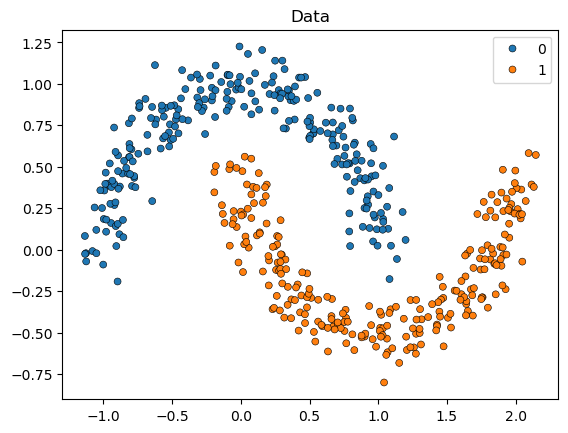

In [2]:
points, labels = make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()


```
Написати свій MLP class:
    можна конфігурувати 
        кількість hidden layers
        розміри hidden layers
        Використовувані активації для кожного layer
    клас має бути написаний саме в PyTorch стилі
Взяти модельний/сподобавшийся датасет (але тільки класифікація) (можна sklearn) та побудувати
    Dataset
    Dataloader
    Training loop
```

In [3]:
def input_validator(layers: list[int], activations: list[nn.Module]):
        if len(layers) - 1 != len(activations):
            warnings.warn("Number of activations doesn't correspond to number of layers.")

        # TODO warning if activation func not among activations in torch.nn


## MLP

In [4]:
class MLP(nn.Module):
    def __init__(self, layer_sizes: list[int], activations: list[nn.Module]):
        input_validator(layer_sizes, activations)   
        super().__init__()
        self.num_layers = len(layer_sizes) - 1
        self.activations = nn.ModuleList(activations)
        self.layers = nn.ModuleList([
            nn.Linear(layer_sizes[i], layer_sizes[i+1]) for i in range(self.num_layers)
        ])
    
    def forward(self, x):
        for i in range(self.num_layers):
            x = self.layers[i](x)
            if (i < len(self.activations)):
                x = self.activations[i](x)
                
        if (self.num_layers > len(self.activations)):
            x = nn.Sigmoid()(x)
        return x


## Load data

In [7]:
labels[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [15]:
b = torch.tensor(labels)
a = (torch.tensor(labels).reshape(-1, 1).float())
print(f'{type(a)=}')
print(f'{type(b)=}')
print(f'{a.shape=}')
print(f'{b.shape=}')
# print(f'{torch.abs(a-b)}')
a[1]

type(a)=<class 'torch.Tensor'>
type(b)=<class 'torch.Tensor'>
a.shape=torch.Size([500, 1])
b.shape=torch.Size([500])


tensor(1)

In [16]:
class MyCustomDataset(Dataset):
    def __init__(self, points, labels):
        self.X = torch.tensor(points).float()
        self.y = torch.tensor(labels).reshape(-1, 1).float()
        
    def __len__(self):
        assert(len(self.X) == len(self.Y))
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [5]:
# X = torch.tensor(points).float()
# y = torch.tensor(labels).reshape(-1, 1).float()

In [17]:
MyDataset = MyCustomDataset(points, labels)

In [19]:
def test(
    layers: list[int],
    activations: list[nn.Module],
    epochs=100,
    lr=1e-3,
    data = MyDataset,
    output=False,
    plot=True,
    debug=False,
):
    model = MLP(layers, activations)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCELoss()

    train_losses = []

    for epoch in range(1, epochs+1):
        if (output):
            print(f'{epoch=}')
        optimizer.zero_grad()
        outputs = model(data.X)
        
        if debug:
            print(f'{outputs.shape=}')
            print(f'{data.y.shape=}')
            print(data.y[:5])
            print(outputs[:5])
        
        
        loss = criterion(outputs, data.y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    if (plot):
        plt.plot(train_losses)

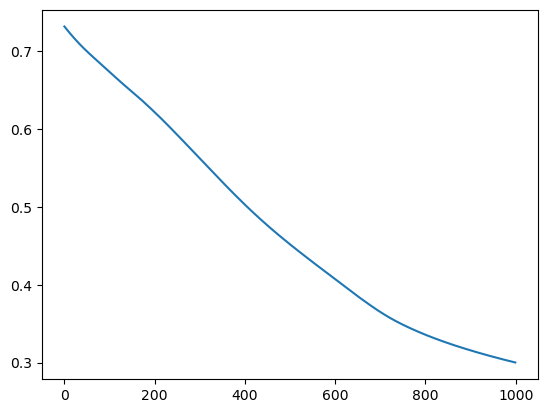

In [20]:
activations = [nn.ReLU(), nn.Sigmoid()]
layers = [2, 5, 1]
test(
    layers=layers, 
    activations=activations,
    epochs=1000, 
    output=False
    )

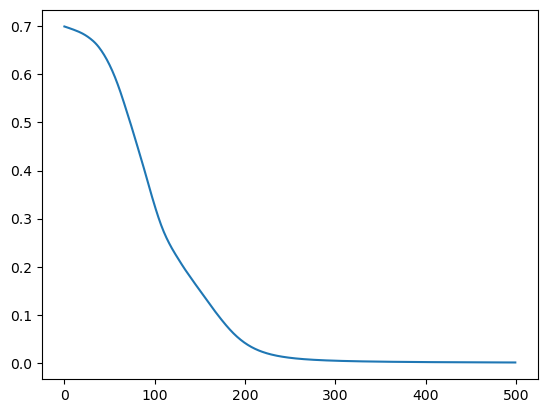

In [21]:
layers = [2, 20, 20, 20, 20, 1]
activations = [nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.Sigmoid()]
test(
    layers=layers, 
    activations=activations,
    epochs=500, 
    output=False
    )

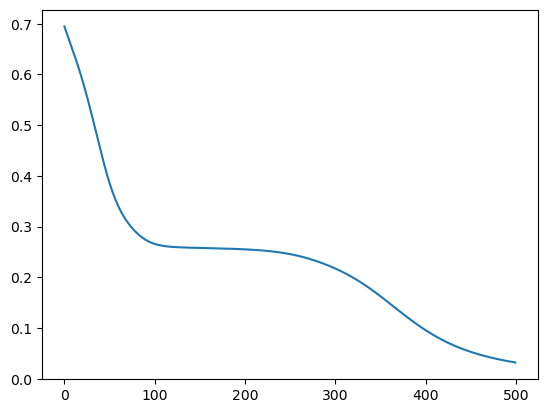

In [22]:
layers = [2, 50, 50, 1]
activations = [nn.Hardswish(), nn.GELU(), nn.Sigmoid()]
test(
    layers=layers, 
    activations=activations,
    epochs=500, 
    output=False
    )

C:\Users\Admin\AppData\Local\Temp\ipykernel_920\2816740009.py:3: UserWarning: Number of activations doesn't correspond to number of layers.
  warnings.warn("Number of activations doesn't correspond to number of layers.")


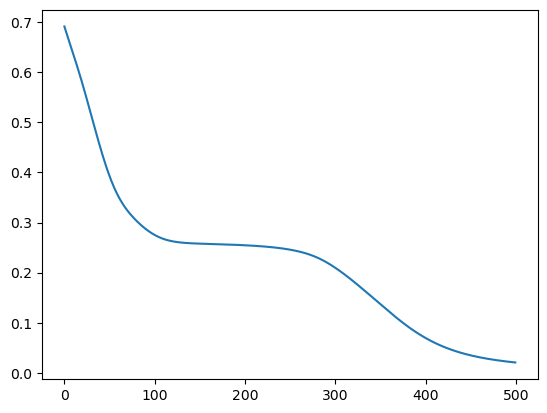

In [23]:
layers = [2, 50, 50, 1]
activations = [nn.Hardswish(), nn.GELU()]
test(
    layers=layers, 
    activations=activations,
    epochs=500, 
    output=False
    )